# Analyzing Subway Data

## 1. Exploratory Data Analysis

For this project I am using data from https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

In [2]:
import pandas
data = pandas.read_csv("turnstile_data_master_with_weather.csv")
data.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


In [32]:
data.describe()

,Unnamed: 0,Hour,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
count,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.0
mean,65975.000000,10.896158,1095.348478,886.890838,30.031894,57.241302,48.259013,29.892714,52.703526,29.965077,0.167100,0.334245,5.543065,56.169775,64.269729,71.769968,0.172276,0.0
std,38091.117022,6.892084,2337.015421,2008.604886,0.125689,8.770891,11.305312,0.146384,9.943590,0.130461,0.373066,0.471728,1.982441,6.338875,6.568289,7.627218,0.429005,0.0
min,0.000000,0.000000,0.000000,0.000000,29.740000,39.000000,22.000000,29.540000,31.000000,29.640000,0.000000,0.000000,1.000000,46.000000,55.000000,58.000000,0.000000,0.0
25%,32987.500000,5.000000,39.000000,32.000000,29.960000,50.000000,38.000000,29.840000,45.000000,29.910000,0.000000,0.000000,5.000000,52.000000,60.000000,65.000000,0.000000,0.0
50%,65975.000000,12.000000,279.000000,232.000000,30.030000,57.000000,51.000000,29.910000,54.000000,29.960000,0.000000,0.000000,5.000000,54.000000,63.000000,71.000000,0.000000,0.0
75%,98962.500000,17.000000,1109.000000,847.000000,30.100000,64.000000,55.000000,29.970000,60.000000,30.050000,0.000000,1.000000,6.000000,60.000000,68.000000,78.000000,0.100000,0.0
max,131950.000000,23.000000,51839.000000,45249.000000,30.310000,70.000000,66.000000,30.230000,68.000000,30.270000,1.000000,1.000000,12.000000,70.000000,78.000000,86.000000,2.180000,0.0


We have 131951 rows.

Before we perform any analysis, it might be useful to take a look at the data we're hoping to analyze. More specifically, let's examine the hourly entries in our NYC subway data and determine what distribution the data follows. .
    
Let's plot two histograms on the same axes to show hourly entries when raining vs. when not raining. 

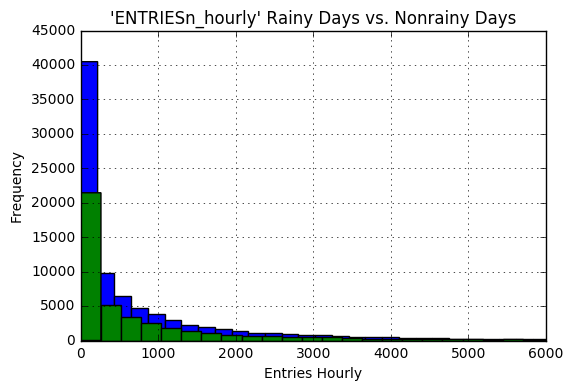

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlim(0, 6000)

data[data['rain'] == 0.0]['ENTRIESn_hourly'].hist(bins=200)
data[data['rain'] == 1.0]['ENTRIESn_hourly'].hist(bins=200)
plt.title("'ENTRIESn_hourly' Rainy Days vs. Nonrainy Days")
plt.xlabel("Entries Hourly")
plt.ylabel("Frequency")

## 2. Statistical Tests

Our data is not normally distributed. Thus, we cannot run Welch's test. 

Let's take the means and run the Mann Whitney U-test on the ENTRIESn_hourly column

In [26]:
import scipy.stats

with_rain_mean = data[data['rain'] == 1.0]['ENTRIESn_hourly'].mean()
without_rain_mean = data[data['rain'] == 0.0]['ENTRIESn_hourly'].mean()

# Mann-Whitney U-Test
U, p = scipy.stats.mannwhitneyu(data[data['rain'] == 1.0]['ENTRIESn_hourly'], data[data['rain'] == 0.0]['ENTRIESn_hourly'])

In [27]:
print (with_rain_mean)
print (without_rain_mean)
print ("U = ", U)
print ("p = ", p)

1105.4463767458733
1090.278780151855
U =  1924409167.0
p =  0.0249403922945


My null hypothesis is that the distributions of both groups (rainy and notrainy days) are identical, so that there is a 50% probability that an observation from a value randomly selected from one population exceeds an observation randomly selected from the other population.

P values less than 0.05 are often reported as “statistically significant”, and interpreted as being small enough to justify rejection of the null hypothesis. Thus, I can make a conclusion that we have different distributions for rainy and not rainy days.

## 3. Implementation of Linear Regression in Python

In [29]:
def normalize_features(df):
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()
    return df_normalized, mu, sigma

In [49]:
def compute_cost(features, values, theta):
    m = len(values)
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2*m)
    return cost

In [46]:
def gradient_descent(features, values, theta, alpha, num_iterations):
    m = len(values)
    cost_history = []

    for i in range(num_iterations):
        pr_val = np.dot(features, theta)
        theta = theta - alpha/m * np.dot((pr_val - values), features)
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
    return theta, pandas.Series(cost_history)

In [68]:
# Select Features 
features = data[['rain', 'precipi', 'Hour', 'meantempi', 'fog']]

In [69]:
# Add UNIT to features using dummy variables
dummy_units = pandas.get_dummies(data['UNIT'], prefix='unit')
features = features.join(dummy_units)

In [70]:
# Values
values = data['ENTRIESn_hourly']
m = len(values)

In [71]:
features, mu, sigma = normalize_features(features)
features['ones'] = np.ones(m) # Add a column of 1s (y intercept)

In [72]:
# Convert features and values to numpy arrays
features_array = np.array(features)
values_array = np.array(values)

In [73]:
len(features_array[0])

471

In [114]:
# Set values for alpha, number of iterations.
alpha = 0.01 
num_iterations = 75

In [115]:
# Initialize theta, perform gradient descent
theta_gradient_descent = np.zeros(len(features.columns))
theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)

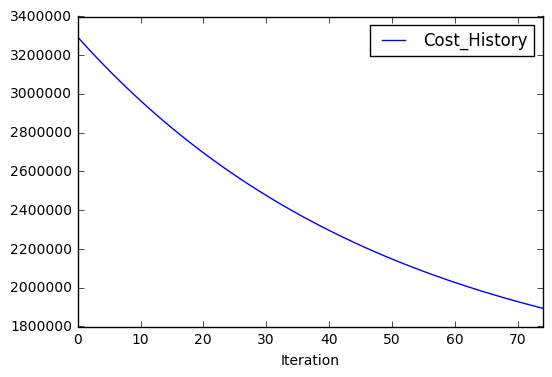

In [116]:
cost_df = pandas.DataFrame({
      'Cost_History': cost_history,
      'Iteration': range(len(cost_history))
   })
cost_df.plot(x='Iteration', y='Cost_History')

In [117]:
predictions = np.dot(features_array, theta_gradient_descent)

In [126]:
#coefficient of determination
def compute_r_squared(data, predictions):
    r_squared = 1 - np.sum((data - predictions)**2) / np.sum((data - np.mean(data))**2)
    return r_squared

In [119]:
compute_r_squared(values_array, predictions)

0.30638411548946054

## 4. Plotting Residuals

Let's  make a histogram of the residuals (the difference between the original hourly entry data and the predicted values).

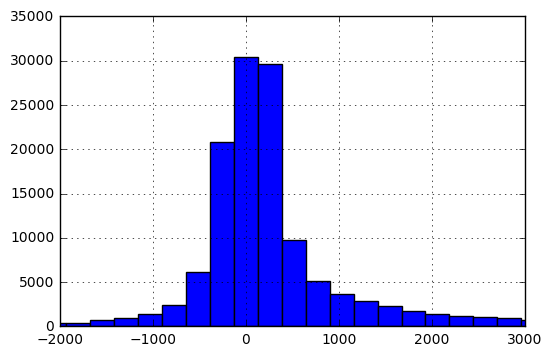

In [125]:
plt.figure()
plt.xlim(-2000, 3000)
(data['ENTRIESn_hourly'] - predictions).hist(bins=200)

This graph confirms that our linear regression works well. For the most of our data the difference between predicted and real values is close to zero. Also, we have almost a normal distribution catered around zero, thus, our algorithm has low bias. 

In [127]:
from ggplot import *

ImportError: No module named 'ggplot'